
```
CNN for computer vision
```
Task: Build and train a convolutional neural network to classify images of clothing using the Fashion MNIST dataset.


Install and import dependencies


In [ ]:
import tensorflow as tf
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Import and load the MNIST Fashion Dataset.

We will use 60,000 images to train and validate the network and 10,000 images to evaluate how accurately the network learned to classify

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True, split=['train[:90%]','train[90%:]', 'test'])
train_dataset, validation_dataset, test_dataset = dataset

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


Notice that this time we've added a split to the training dataset, reserving 10% for use during validation.
```
The model is trained using train_dataset.
The model validates as it is being trained using the validation_dataset
The model is tested against test_dataset.
```



Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

Explore the data format and preprocess it

In [ ]:
num_train_examples = len(train_dataset)
num_validation_examples = len(validation_dataset)
num_test_examples = len(test_dataset)
print("Number of training examples: {}".format(num_train_examples))
print("Number of validation examples: {}".format(num_validation_examples))
print("Number of test examples:     {}".format(num_test_examples))


Number of training examples: 54000
Number of validation examples: 6000
Number of test examples:     10000


In [ ]:

# Preprocessing
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
validation_dataset = validation_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
validation_dataset = validation_dataset.cache()
test_dataset  =  test_dataset.cache()

Sample an image to observe it

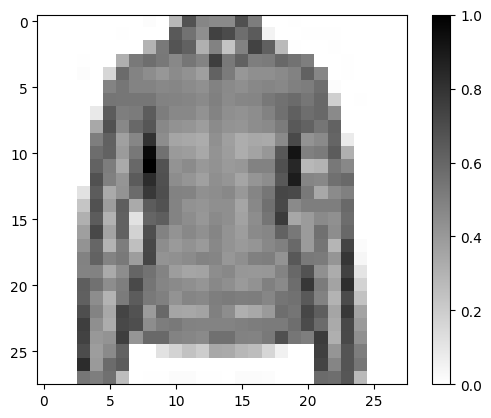

In [ ]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Building the neural network:
1. Set up the layers
2. Compile the model
3. Train the model
4. Evaluate it's accuracy
5. Make predictions and explore -TODO

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
  tf.keras.layers.AveragePooling2D((2, 2), strides=2),
  tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
  tf.keras.layers.AveragePooling2D((2, 2), strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation='softmax')
])

Compile The model:

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Train the model:

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().shuffle(num_train_examples).batch(BATCH_SIZE)
validation_dataset = validation_dataset.cache().batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:

model.fit(train_dataset, epochs=10, validation_data=validation_dataset)
#Error - training and validation dataset not of the same size

Epoch 1/10
1688/1688 [==============================] - 46s 24ms/step - loss: 0.4642 - accuracy: 0.8340 - val_loss: 0.3334 - val_accuracy: 0.8838
Epoch 2/10
1688/1688 [==============================] - 41s 24ms/step - loss: 0.3117 - accuracy: 0.8879 - val_loss: 0.2902 - val_accuracy: 0.8987
Epoch 3/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.2660 - accuracy: 0.9026 - val_loss: 0.2474 - val_accuracy: 0.9090
Epoch 4/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.2346 - accuracy: 0.9134 - val_loss: 0.2255 - val_accuracy: 0.9175
Epoch 5/10
1688/1688 [==============================] - 43s 25ms/step - loss: 0.2110 - accuracy: 0.9217 - val_loss: 0.2210 - val_accuracy: 0.9185
Epoch 6/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.1913 - accuracy: 0.9281 - val_loss: 0.2251 - val_accuracy: 0.9180
Epoch 7/10
1688/1688 [==============================] - 41s 24ms/step - loss: 0.1730 - accuracy: 0.9349 - val_loss: 0.2088 -

Evaluating accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 5s 16ms/step - loss: 0.2388 - accuracy: 0.9229
Accuracy on test dataset: 0.9229000210762024


Accuracy on test dataset: 0.9229000210762024

Make and observe predictions on sample images

In [12]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 332ms/step


In [13]:
predictions.shape


(32, 10)

In [15]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

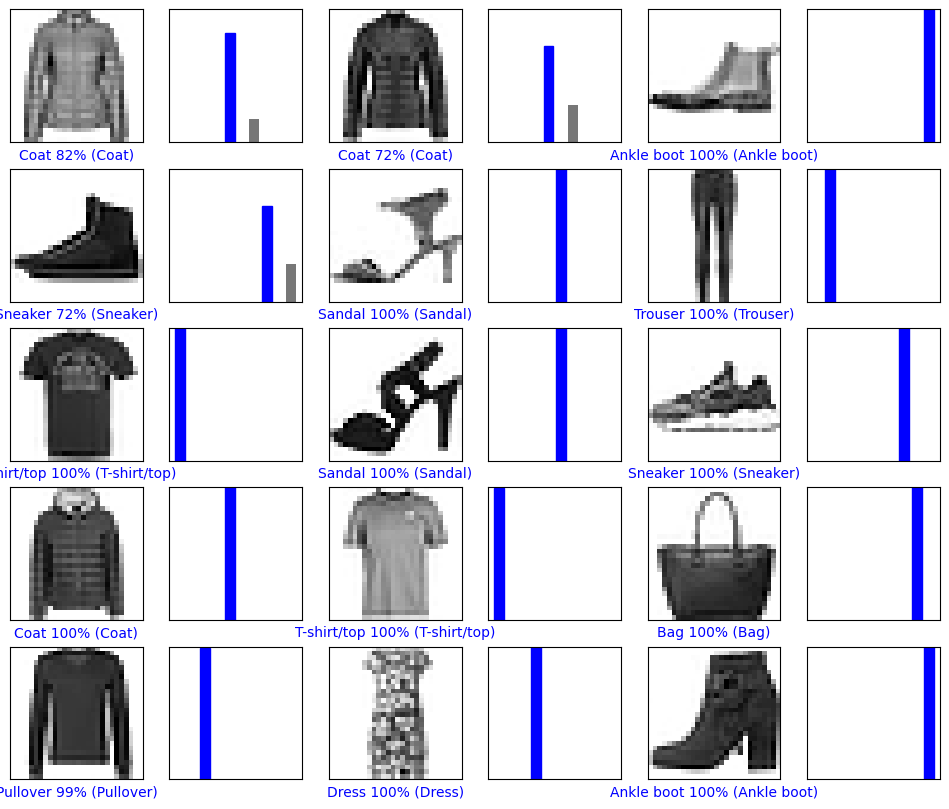

In [16]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Part 2: CIFAR 10 Datasets with Simple CNNs and MLP



Extract and load the CIFAR dataset



In [17]:
import os
import glob

# Download the data
_URL = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
zip_dir = tf.keras.utils.get_file('cifar-10-python.tar.gz', origin=_URL, extract=True)

# Get the data and meta file names
data_dir = os.path.join(os.path.dirname(zip_dir), 'cifar-10-batches-py')
train_files = glob.glob(os.path.join(data_dir,"data_batch_*"))
test_file = os.path.join(data_dir,"test_batch")
meta_file = os.path.join(data_dir,"batches.meta")

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def build_dataset(files):
    x = []
    y = []
    for file in files:
        dict = unpickle(file)
        for image in dict[b'data']:
            # Image in the dataset is stored as a 3072 length 1D array
            x.append(image)
        for label in dict[b'labels']:
            y.append(label)

    return tf.data.Dataset.from_tensor_slices((x,y))

# Build the training dataset
train_dataset  = build_dataset(train_files)

# Build the testing dataset
test_dataset = build_dataset([test_file])

# Get the metadata
meta = unpickle(meta_file)

170498071/170498071 [==============================] - 2s 0us/step


Preprocess the data: normalization and reshaping

In [18]:
def reshape_and_normalize(images, labels):
    # Convert from 1D array to 3D array of [3, 32, 32]
    # the image is stored as [colour channel, width, height]
    images = tf.reshape(images, (3, 32, 32))
    # Swap from [colour channel, width, height] to [width, height, colour channel]
    images = tf.transpose(images, (1, 2, 0))
    # Convert to float32
    images = tf.cast(images, tf.float32)
    # Normalize
    images /= 255
    return images, labels


train_dataset =  train_dataset.map(reshape_and_normalize)
test_dataset  =  test_dataset.map(reshape_and_normalize)

In [19]:
num_train_examples = 50000
BATCH_SIZE = 32
train_dataset = train_dataset.cache().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

Create and train model

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

Compile the model

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', 'mse'])
model.fit(train_dataset,
          epochs=2)

Epoch 1/2
1563/1563 [==============================] - 59s 36ms/step - loss: 1.3756 - accuracy: 0.5087 - mse: 34.6971
Epoch 2/2
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0155 - accuracy: 0.6445 - mse: 39.0145


TODO *REPORT ACCURACY*

Evaluate the model

In [22]:
model.evaluate(test_dataset)

313/313 [==============================] - 5s 14ms/step - loss: 0.9661 - accuracy: 0.6586 - mse: 40.8880


[0.9660671949386597, 0.6585999727249146, 40.88798904418945]

Part 3: Improving part 2 models